In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv
User uploaded file "UCI_Credit_Card.csv" with length 2862995 bytes


In [3]:
uploaded
import pandas as pd
import io
df=pd.read_csv(io.StringIO(uploaded['UCI_Credit_Card.csv'].decode('utf-8')))

In [4]:
print(df.isnull().sum())
print(df.shape)
print(df.head())
print(df.dtypes)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64
(30000, 25)
   ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2  ...       0.0       0.0                           1
1   2   120000.0    2  ..

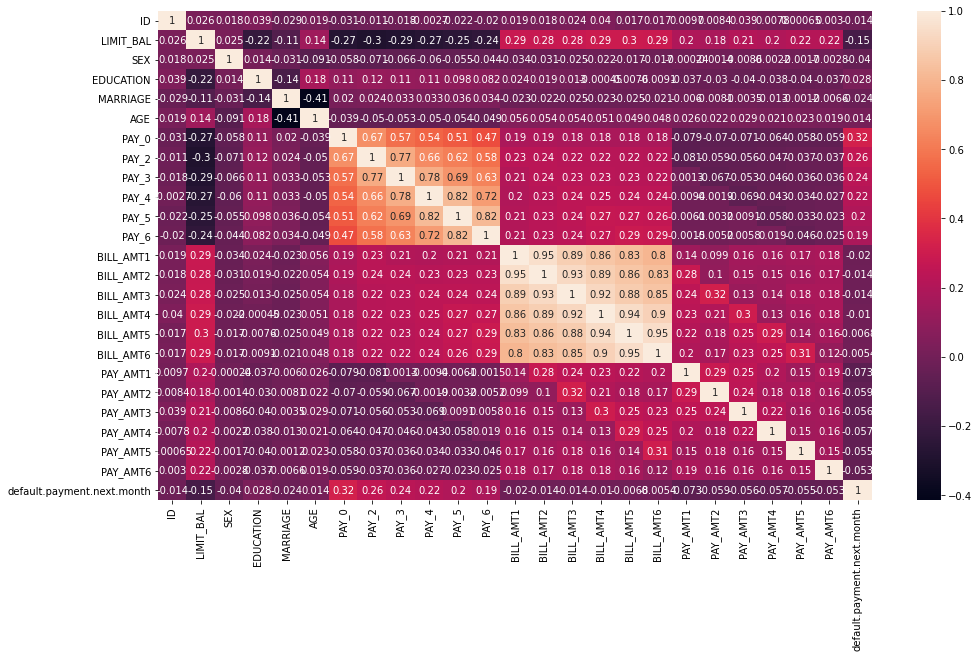

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [6]:
def credit_fuc(optimizer='adam'):
  classifier=Sequential()
  classifier.add(Dense(activation='relu',kernel_initializer='uniform',output_dim=12,input_dim=24))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(activation='relu',kernel_initializer='uniform',output_dim=6))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(output_dim=1,activation='sigmoid',kernel_initializer='uniform'))
  classifier.compile(metrics=['accuracy'],loss='binary_crossentropy',optimizer='adam')
  return classifier

In [7]:
X=df.iloc[:,0:24]
y=df.iloc[:,24]
print(X.shape,type(X))
print(y.shape,type(y))

(30000, 24) <class 'pandas.core.frame.DataFrame'>
(30000,) <class 'pandas.core.series.Series'>


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [31]:
kc=KerasClassifier(build_fn=credit_fuc)
parameter={'batch_size':[32,64],'optimizer':['adam','rmsprop'],'epochs':[5,10]}
grid_search=GridSearchCV(estimator=kc,param_grid=parameter,scoring='accuracy',cv=10)
grid_search=grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer="uniform", input_dim=24, units=12)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer="uniform", units=6)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", kernel_initializer="uniform", units=1)`
  import sys


Epoch 1/5
21600/21600 [==============================] - 1s 47us/step - loss: 0.5219 - accuracy: 0.7937
Epoch 2/5
21600/21600 [==============================] - 1s 40us/step - loss: 0.4670 - accuracy: 0.8082
Epoch 3/5
21600/21600 [==============================] - 1s 40us/step - loss: 0.4639 - accuracy: 0.8084
Epoch 4/5
21600/21600 [==============================] - 1s 41us/step - loss: 0.4627 - accuracy: 0.8069
Epoch 5/5
21600/21600 [==============================] - 1s 41us/step - loss: 0.4575 - accuracy: 0.8104
Epoch 1/5
21600/21600 [==============================] - 1s 49us/step - loss: 0.5338 - accuracy: 0.7902
Epoch 2/5
21600/21600 [==============================] - 1s 40us/step - loss: 0.4773 - accuracy: 0.8079
Epoch 3/5
21600/21600 [==============================] - 1s 41us/step - loss: 0.4697 - accuracy: 0.8108
Epoch 4/5
21600/21600 [==============================] - 1s 42us/step - loss: 0.4670 - accuracy: 0.8090
Epoch 5/5
21600/21600 [==============================] - 1s 39us

In [34]:
grid_bestparameter=grid_search.best_params_
grid_accuracy = grid_search.best_score_
print(grid_bestparameter)
print(grid_accuracy)

{'batch_size': 32, 'epochs': 10, 'optimizer': 'rmsprop'}
0.8106666666666668


In [16]:
kc=KerasClassifier(build_fn=credit_fuc)
parameter={'batch_size':[32,64],'optimizer':['adam','rmsprop'],'epochs':[5,10]}
rs=RandomizedSearchCV(estimator=kc,param_distributions=parameter,scoring='accuracy',cv=10)
rs = rs.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer="uniform", input_dim=24, units=12)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer="uniform", units=6)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", kernel_initializer="uniform", units=1)`
  import sys


Epoch 1/5
21600/21600 [==============================] - 1s 48us/step - loss: 0.5469 - accuracy: 0.7775
Epoch 2/5
21600/21600 [==============================] - 1s 41us/step - loss: 0.4931 - accuracy: 0.7785
Epoch 3/5
21600/21600 [==============================] - 1s 40us/step - loss: 0.4861 - accuracy: 0.7785
Epoch 4/5
21600/21600 [==============================] - 1s 39us/step - loss: 0.4853 - accuracy: 0.7785
Epoch 5/5
21600/21600 [==============================] - 1s 39us/step - loss: 0.4870 - accuracy: 0.7785
Epoch 1/5
21600/21600 [==============================] - 1s 45us/step - loss: 0.5324 - accuracy: 0.7804
Epoch 2/5
21600/21600 [==============================] - 1s 38us/step - loss: 0.4834 - accuracy: 0.7812
Epoch 3/5
21600/21600 [==============================] - 1s 41us/step - loss: 0.4797 - accuracy: 0.7812
Epoch 4/5
21600/21600 [==============================] - 1s 41us/step - loss: 0.4783 - accuracy: 0.7812
Epoch 5/5
21600/21600 [==============================] - 1s 39us

In [17]:
best_parameter =rs.best_params_
best_score = rs.best_score_
print(best_parameter)
print(best_score)

{'optimizer': 'rmsprop', 'epochs': 5, 'batch_size': 32}
0.8106250000000002


0.8166666666666667


array([[4413,  251],
       [ 849,  487]])

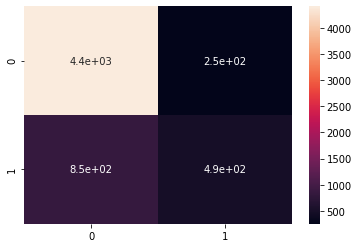

In [33]:
y_pred=grid_search.predict(X_test)
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(accuracy_score(y_test,y_pred))

cm